In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [2]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3267,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
3268,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
3269,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
3270,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500
3271,2022-12-30,86.980003,88.300003,86.570000,88.230003,88.230003,23986300


In [3]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index=df['Date']
df
train_size=(int)(0.8*len(df.index))
test_size=len(df.index)-train_size

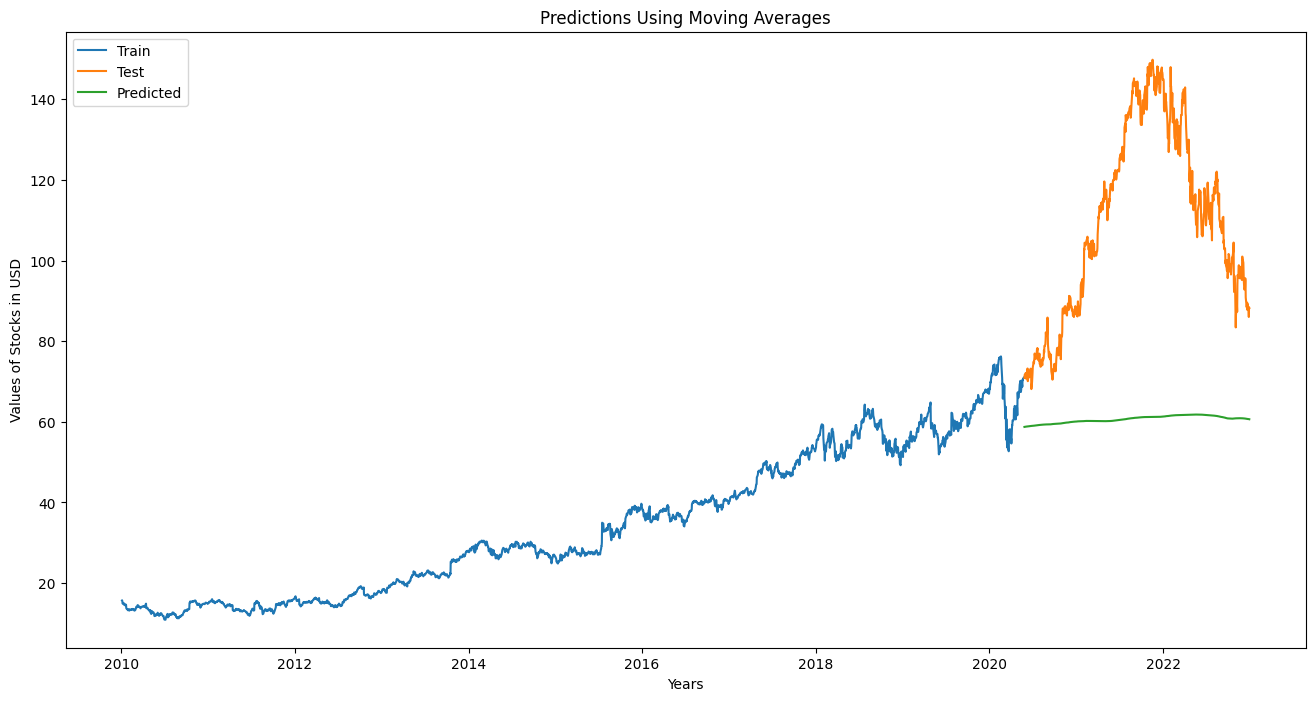

Error using R2 Metric= -4.390798332700979


In [4]:
# MODEL 1 ---- Moving Averages.

import sklearn
from sklearn.linear_model import LinearRegression
data_1 = pd.DataFrame(index=np.arange(len(df.index)))
df.sort_index(inplace=True)
data_1.index=df['Date']
data_1['Date']=pd.Series(df['Date'])
data_1['Close']=pd.Series(df['Adj Close'])
data_1.head()
train_1=data_1.iloc[:train_size][:]
test_1=data_1.iloc[train_size:][:]
preds=[]
for i in range(0,test_1.shape[0]):
    a = train_1['Close'][len(train_1)-test_size+i:].sum() + sum(preds)
    b = a/test_size
    preds.append(b)
plt.figure(figsize=(16,8))
plt.plot(train_1.index,train_1['Close'])

plt.plot(test_1['Close'])
plt.plot(test_1.index,preds)
plt.xlabel('Years')
plt.ylabel('Values of Stocks in USD')
plt.title('Predictions Using Moving Averages')
plt.legend(['Train','Test','Predicted'])
plt.show()

print("Error using R2 Metric=",sklearn.metrics.r2_score(test_1['Close'], preds))

/tmp/ipython-input-5-1716541075.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2.drop('Close',axis=1,inplace=True)
/tmp/ipython-input-5-1716541075.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2.drop('Date',axis=1,inplace=True)
/tmp/ipython-input-5-1716541075.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2.drop('Close',axis=1,inplace=True)
/tmp/ipython-input-5-1716541075.py:27: SettingWithCopyWarnin

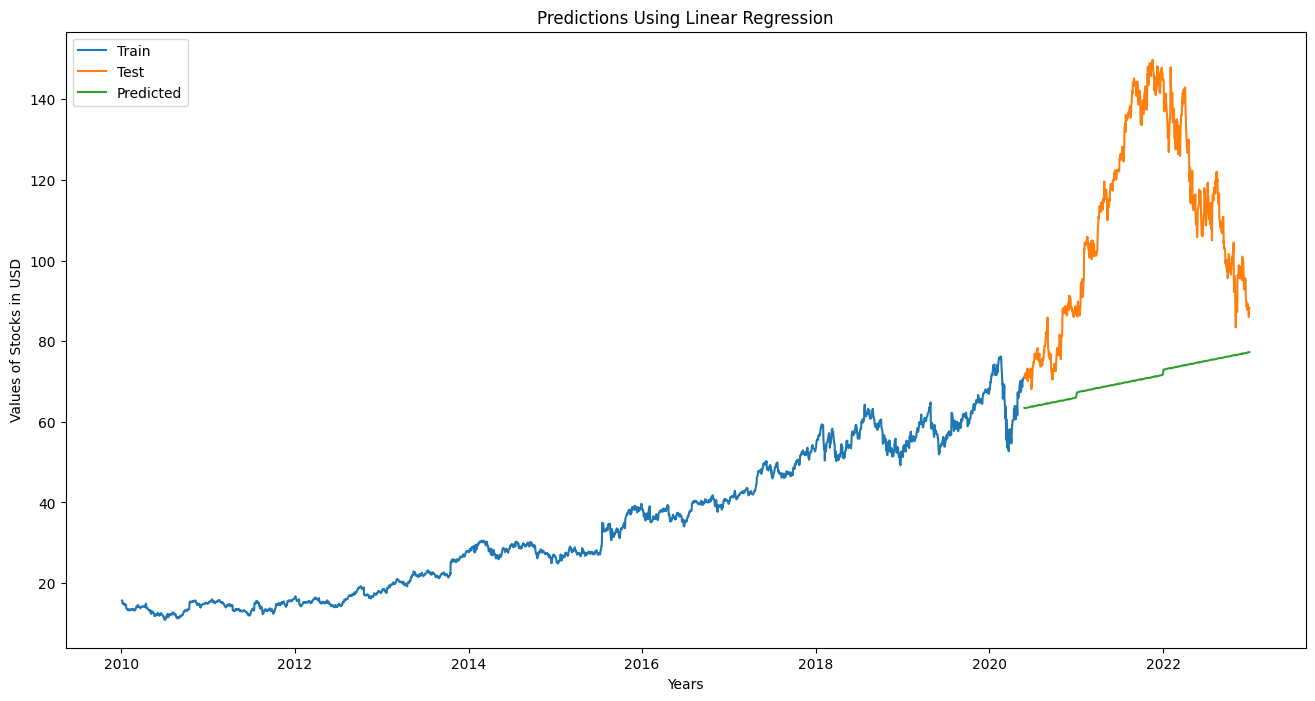

Error using R2 Metric= -2.7025683944115833


In [5]:
# MODEL 2 ---- Linear Regression

data_2 = pd.DataFrame(index=np.arange(len(df.index)))
df.sort_index(inplace=True)
data_2.index=df['Date']
data_2['Date']=pd.Series(df['Date'])
data_2['Close']=pd.Series(df['Adj Close'])
data_2.head()
train_2=data_2.iloc[:train_size][:]
test_2=data_2.iloc[train_size:][:]

year=data_2['Date'].dt.year
month=data_2['Date'].dt.month
month_day=data_2['Date'].dt.day
data_2['year']=year
data_2['month']=month
data_2['month_day']=month_day
data_2['Year_day']=30*data_2['month']+data_2['month_day']
data_2.head()
train_2 =data_2[:train_size]
test_2 = data_2[train_size:]
Y_train=train_2['Close']
train_2.drop('Close',axis=1,inplace=True)
train_2.drop('Date',axis=1,inplace=True)
Y_test=test_2['Close']
test_2.drop('Close',axis=1,inplace=True)
test_2.drop('Date',axis=1,inplace=True)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_2,Y_train)
pred=model.predict(test_2)
plt.figure(figsize=(16,8))
plt.plot(train_2.index,Y_train)
plt.plot(test_2.index,Y_test)
plt.plot(test_2.index,pred)
plt.xlabel('Years')
plt.ylabel('Values of Stocks in USD')
plt.title('Predictions Using Linear Regression')
plt.legend(['Train','Test','Predicted'])
plt.show()
print("Error using R2 Metric=",sklearn.metrics.r2_score(Y_test, pred))

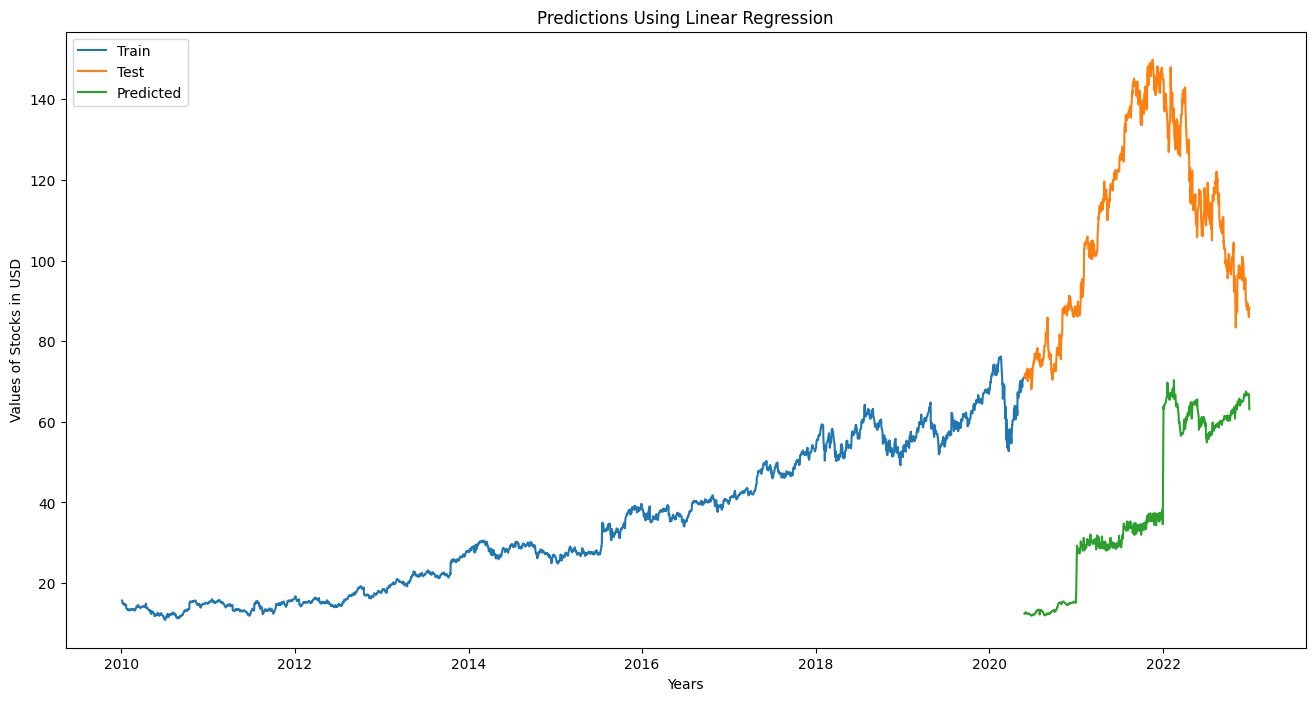

Error using R2 Metric= -9.050683868881263


In [6]:
# Model 3 --- KNN

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_3 = scaler.fit_transform(train_2)
train_3 = pd.DataFrame(train_3)
test_3 = scaler.fit_transform(test_2)
test_3 = pd.DataFrame(test_3)
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(train_3,Y_train)
preds = model.predict(test_3)
plt.figure(figsize=(16,8))
plt.plot(train_2.index,Y_train)
plt.plot(test_2.index,Y_test)
plt.plot(test_2.index,preds)
plt.xlabel('Years')
plt.ylabel('Values of Stocks in USD')
plt.title('Predictions Using Linear Regression')
plt.legend(['Train','Test','Predicted'])
plt.show()
print("Error using R2 Metric=",sklearn.metrics.r2_score(Y_test, preds))


In [12]:
pip install keras

In [13]:
#MODEL ---- LSTM

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
df = df.sort_index(ascending=True, axis=0)
tot_data=df['Close'].values
tot_data=tot_data.reshape((-1,1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tot_data)
x_train,y_train=[],[]
for i in range(60,train_size):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train
model = Sequential()
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

2557/2557 - 71s - 28ms/step - loss: 2.9247e-04


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step


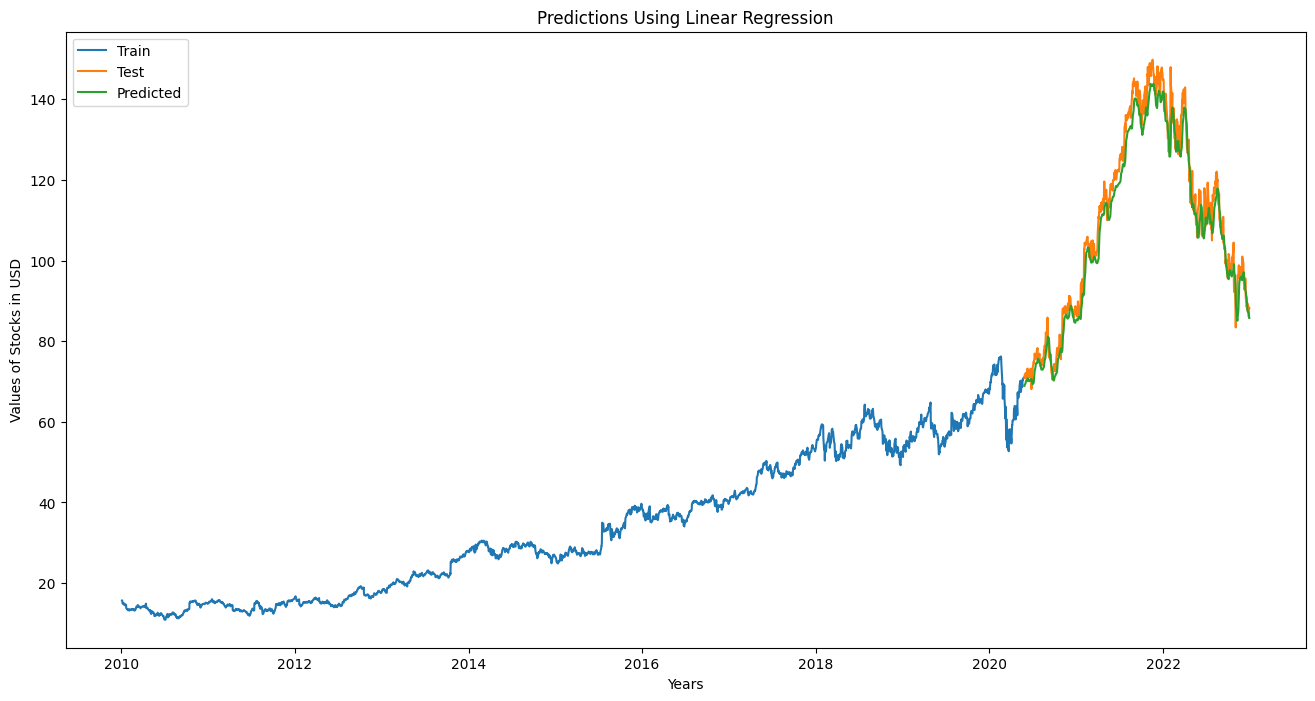

Error using R2 Metric= 0.9661560789617047


In [14]:
X_test = []
for i in range(len(tot_data)-test_size,len(tot_data)):
    X_test.append(scaled_data[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
plt.figure(figsize=(16,8))
plt.plot(df['Date'][:train_size],df['Close'][:train_size])
plt.plot(df['Date'][train_size:],df['Close'][train_size:])
plt.plot(df['Date'][train_size:],closing_price)
plt.xlabel('Years')
plt.ylabel('Values of Stocks in USD')
plt.title('Predictions Using Linear Regression')
plt.legend(['Train','Test','Predicted'])
plt.show()
print("Error using R2 Metric=",sklearn.metrics.r2_score(df['Close'][train_size:].values, closing_price))
